# <span style="Algerian:cursive;font-size:50px;color:Purple;">Brain_Stroke_Prediction
    

***<span style="Algerian:cursive;font-size:25;color:Red;">This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.</span>***

Dataset Link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# <span style="Algerian:cursive;font-size:25;color:Red;"> Dataset Information:

1. ***id:*** unique identifier
2. ***gender:*** "Male", "Female" or "Other"
3. ***age:*** age of the patient
4. ***hypertension:*** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. ***heart_disease:*** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ***ever_married:*** "No" or "Yes"
7. ***work_type:*** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. ***Residence_type:*** "Rural" or "Urban"
9. ***avg_glucose_level:*** average glucose level in blood
10. ***bmi:*** body mass index
11. ***smoking_status:*** "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. ***stroke:*** 1 if the patient had a stroke or 0 if not 

# <span style="Algerian:cursive;font-size:25;color:Red;"> Objective

Visualize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.

# <span style="Algerian:cursive;font-size:25px;color:red;">Import Data</span>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
b=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Brain_Stroke_data.csv")
b.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
b.shape

(5110, 12)

***There are 5110 rows and 12 columns in this dataset.***

In [4]:
b.size

61320

In [5]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
b.describe().T             # T : Tranpose

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [7]:
b.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# <span style="Algerian:cursive;font-size:25px;color:red;"> Checking Missing Values & Duplicalted Values</span>

In [8]:
b.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***There are 201 missing values in bmi column.***

In [9]:
print("Mean =", b["bmi"].mean())
print("Median = ", b["bmi"].median())

Mean = 28.893236911794666
Median =  28.1


In [10]:
b["bmi"].fillna(b["bmi"].mean(),inplace=True)
b.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
b.duplicated().sum()

0

# <span style="Algerian:cursive;font-size:25px;color:red;"> Finding & Removing Outliers</span>

id                      AxesSubplot(0.125,0.11;0.0945122x0.77)
age                  AxesSubplot(0.238415,0.11;0.0945122x0.77)
hypertension         AxesSubplot(0.351829,0.11;0.0945122x0.77)
heart_disease        AxesSubplot(0.465244,0.11;0.0945122x0.77)
avg_glucose_level    AxesSubplot(0.578659,0.11;0.0945122x0.77)
bmi                  AxesSubplot(0.692073,0.11;0.0945122x0.77)
stroke               AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

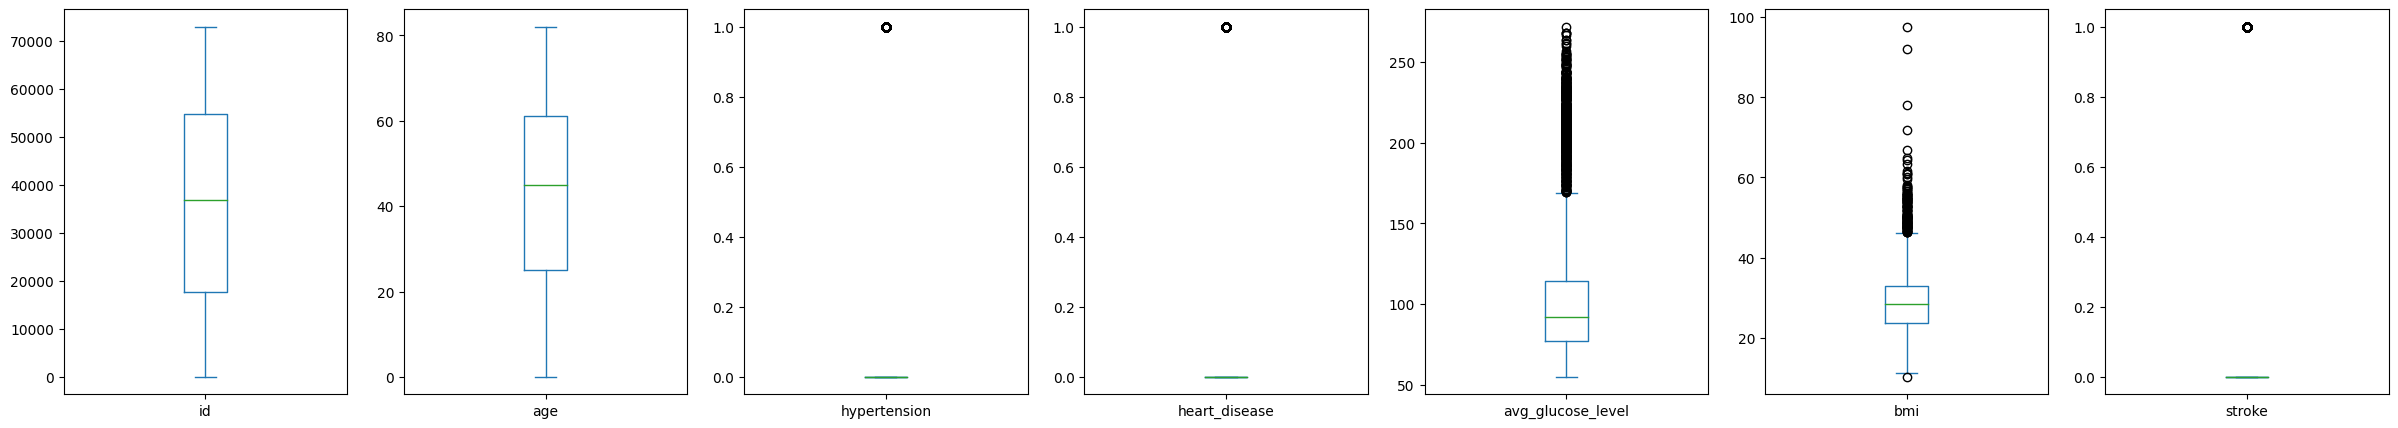

In [12]:
b.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(1,7), figsize=(30,5) )

***avg_glucose_level has large number of outliers present in the dataset.***

id                      AxesSubplot(0.125,0.11;0.0945122x0.77)
age                  AxesSubplot(0.238415,0.11;0.0945122x0.77)
hypertension         AxesSubplot(0.351829,0.11;0.0945122x0.77)
heart_disease        AxesSubplot(0.465244,0.11;0.0945122x0.77)
avg_glucose_level    AxesSubplot(0.578659,0.11;0.0945122x0.77)
bmi                  AxesSubplot(0.692073,0.11;0.0945122x0.77)
stroke               AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

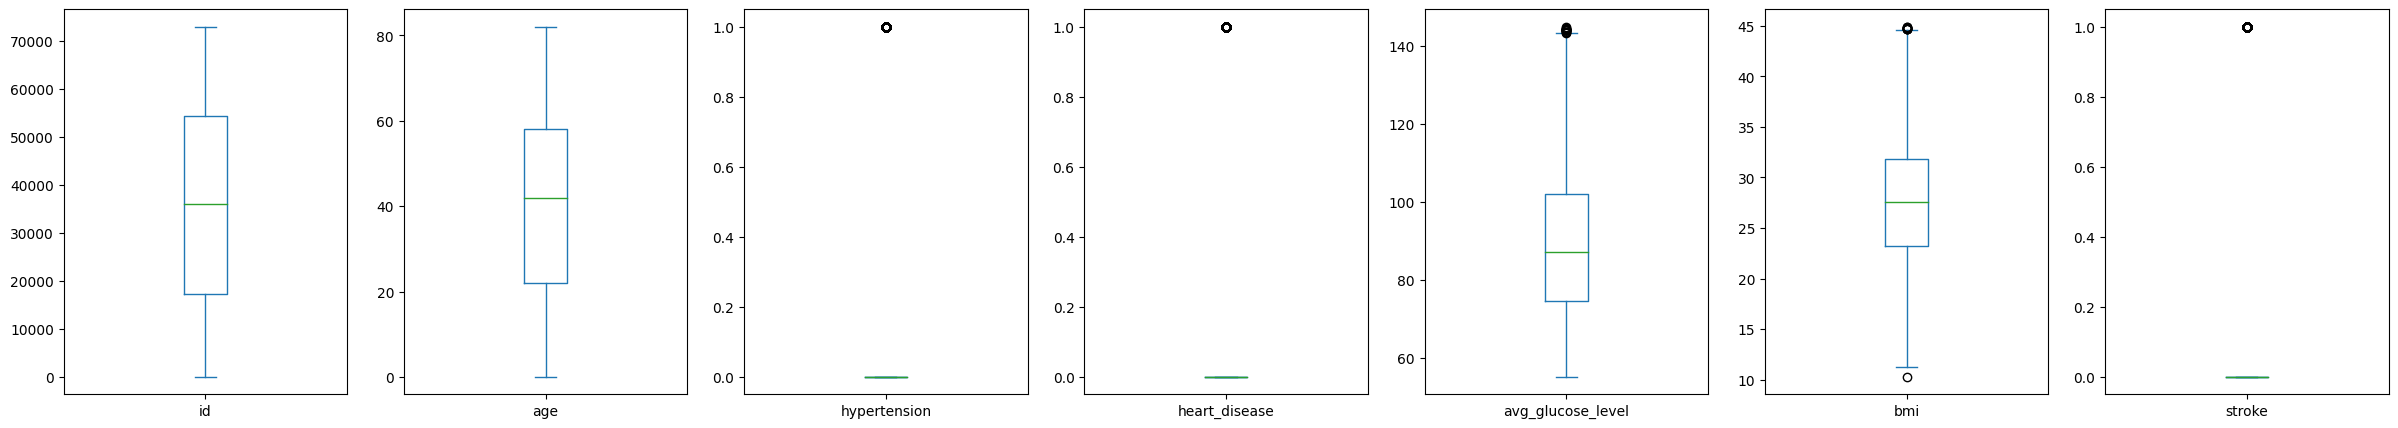

In [13]:
b=b[b.avg_glucose_level < 145]
b=b[b.bmi < 45]

b.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(1,7), figsize=(30,5) )

In [14]:
b.shape

(4226, 12)

# <span style="Algerian:cursive;font-size:25px;color:red;"> To Check Multicolliearity</span>

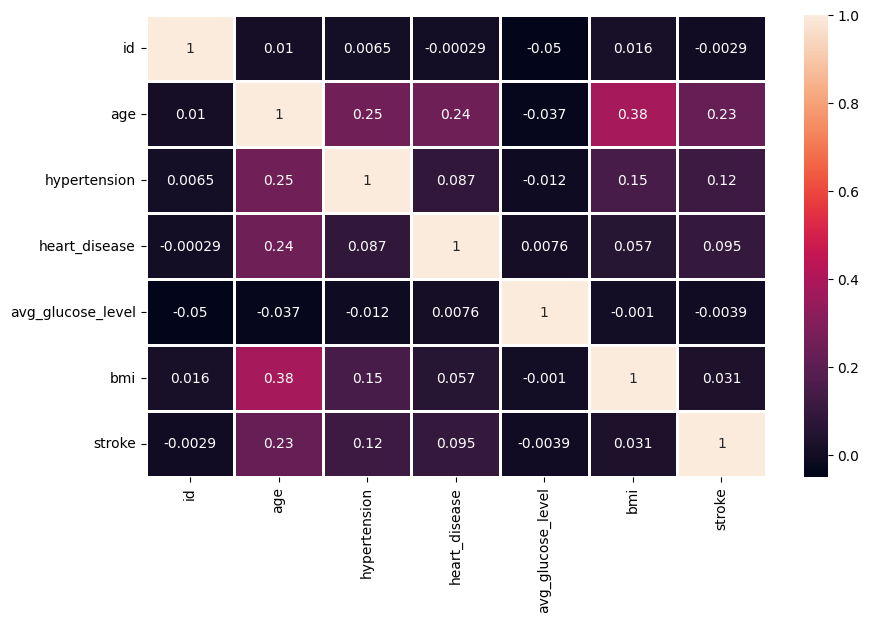

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(b.corr(),annot=True,linewidths=1)
plt.show()

# <span style="Algerian:cursive;font-size:25px;color:red;"> Data Visualisation </span>

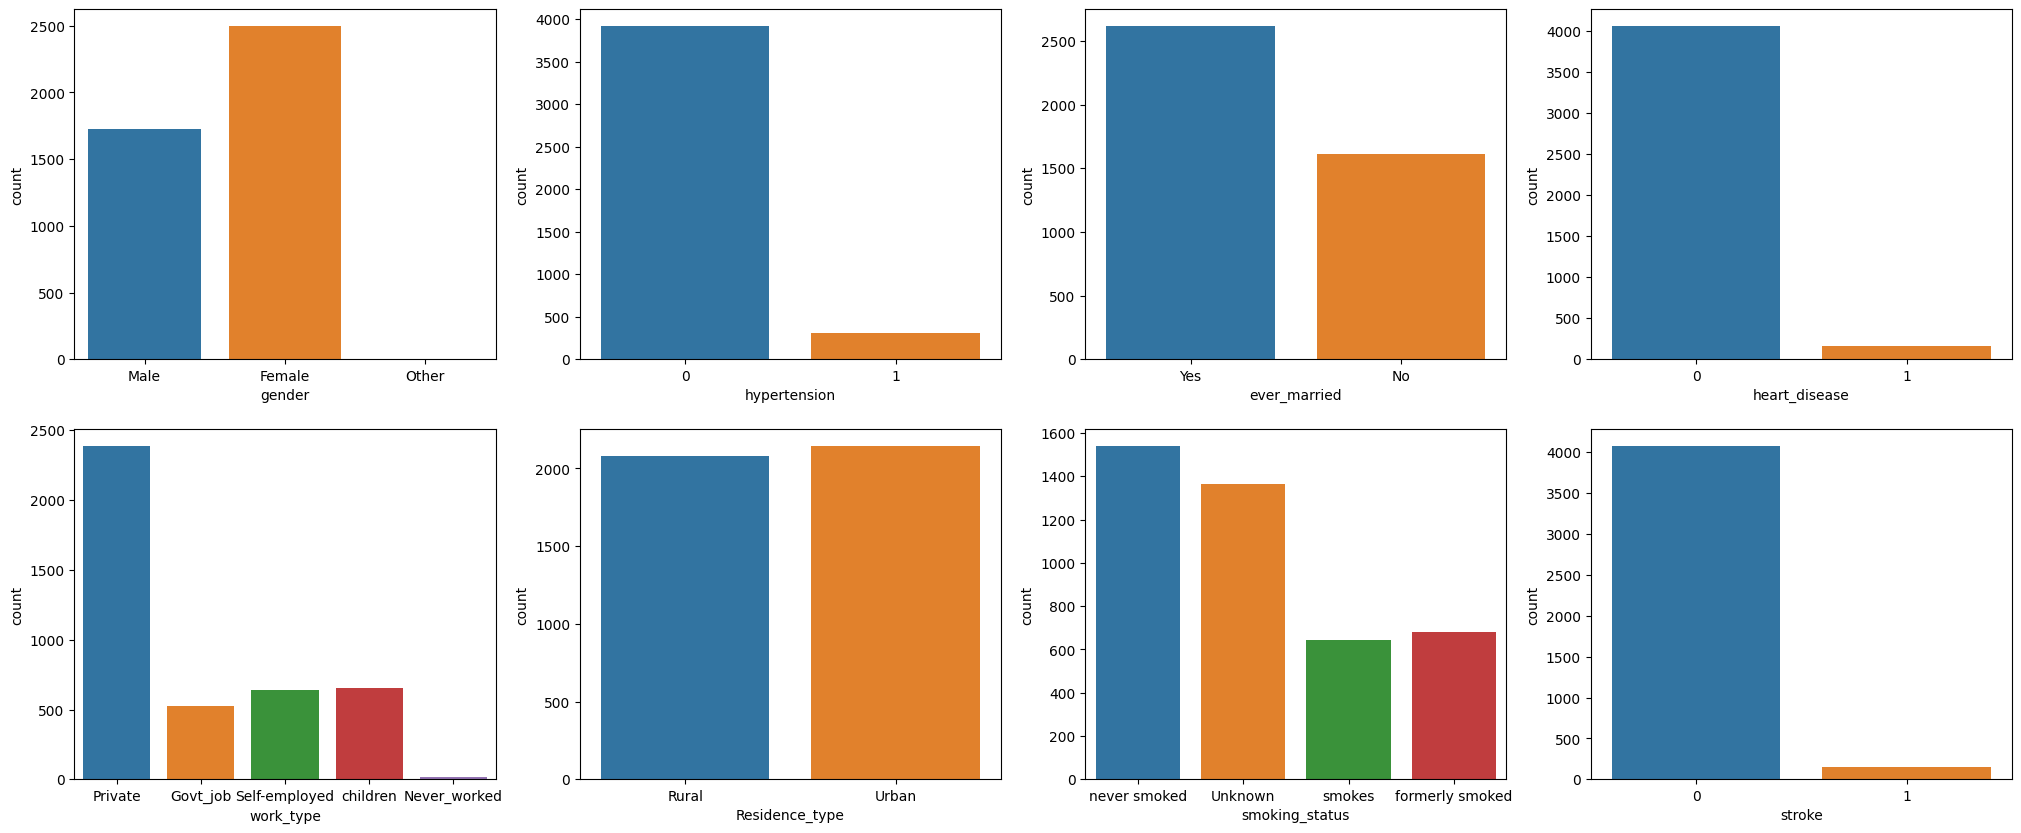

In [16]:
Col = ['gender', 'hypertension', 'ever_married', 'heart_disease','work_type' ,'Residence_type', 'smoking_status','stroke' ]              
plt.figure(figsize=(25,10))
for i, col in enumerate(Col):
    plt.subplot(2,4,i+1)
    sns.countplot(data=b, x=col)

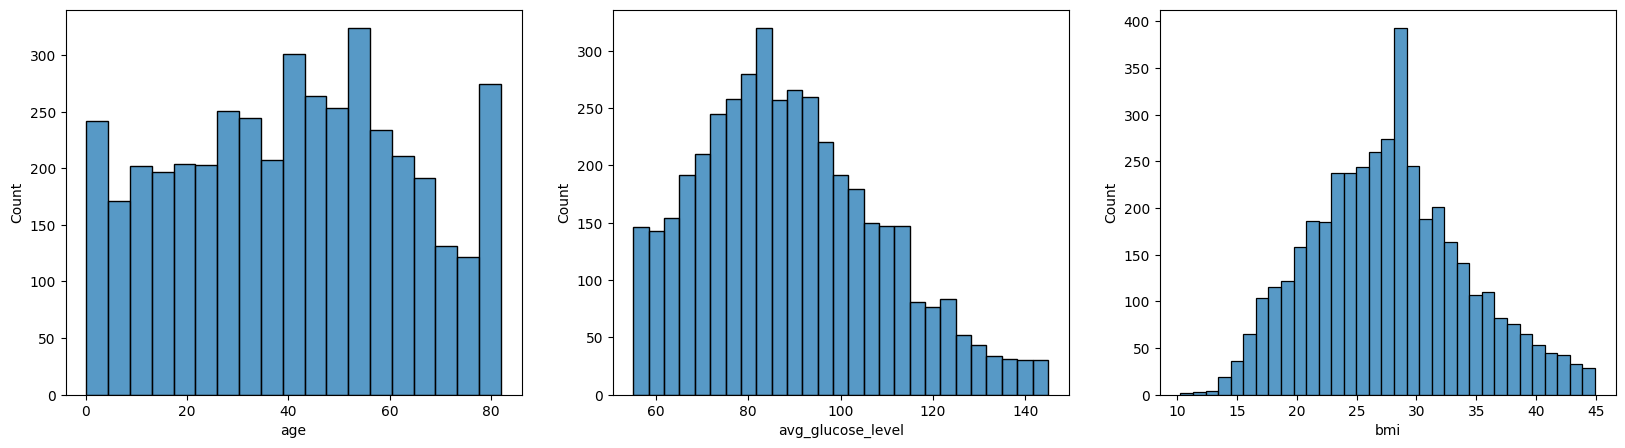

In [17]:
Num_col = ['age', 'avg_glucose_level', 'bmi'  ]

plt.figure(figsize=(20,5))
for i, col in enumerate(Num_col):
    plt.subplot(1,3,i+1)
    sns.histplot(data=b, x=col)

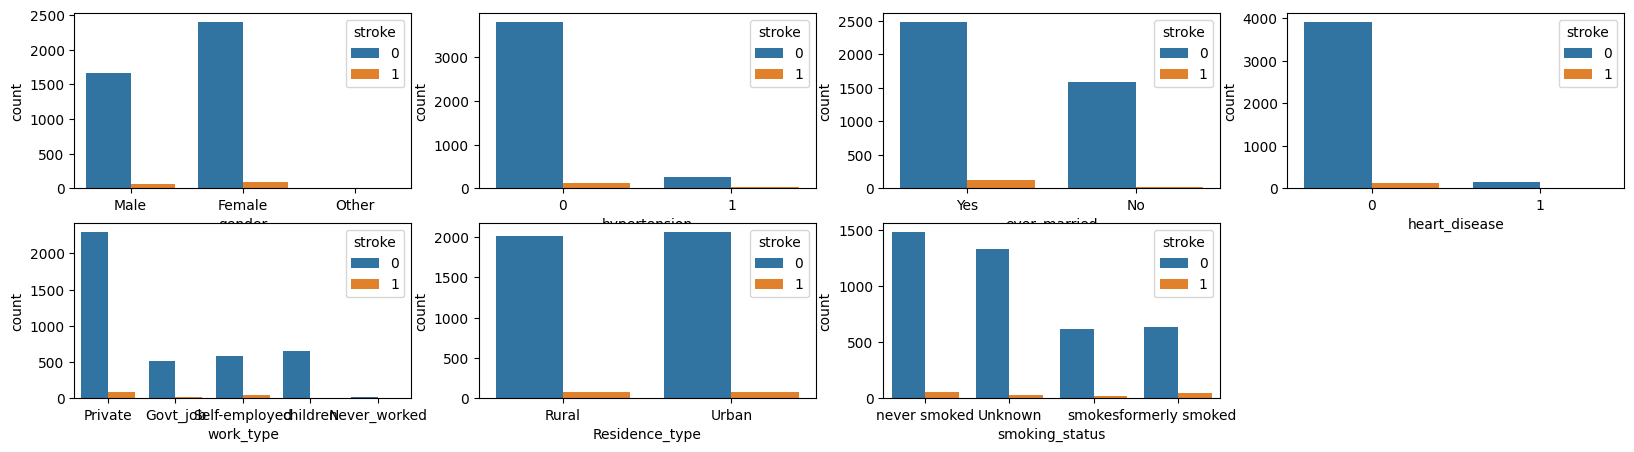

In [18]:
Cat_Col = ['gender', 'hypertension', 'ever_married', 'heart_disease','work_type' ,'Residence_type', 'smoking_status']

plt.figure(figsize=(20,5))
for i, col in enumerate(Cat_Col):
    plt.subplot(2,4,i+1)  
    sns.countplot(data=b, x=col, hue='stroke')
    

In [19]:
#To create a list of character columns
lst=[]
for i in b.columns:
    if b[i].dtype == "O":
        lst.append(i)
    
for col in lst:
    print(col)
    print("Number of unique classes :",b[col].unique())
    print('\n')

gender
Number of unique classes : ['Male' 'Female' 'Other']


ever_married
Number of unique classes : ['Yes' 'No']


work_type
Number of unique classes : ['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']


Residence_type
Number of unique classes : ['Rural' 'Urban']


smoking_status
Number of unique classes : ['never smoked' 'Unknown' 'smokes' 'formerly smoked']




In [82]:
print("gender Unique :",b.gender.unique())
print("ever_married Unique :",b.ever_married.unique())
print("work_type Unique :",b.work_type.unique())
print("Residence_type Unique :",b.Residence_type.unique())
print("smoking_status Unique :",b.smoking_status.unique())


gender Unique : [1 0 2]
ever_married Unique : [1 0]
work_type Unique : [2 0 3 4 1]
Residence_type Unique : [0 1]
smoking_status Unique : [2 0 3 1]


In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in lst:
    b[i]=lb.fit_transform(b[i])

In [21]:
b.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1


***Now we can see that our data has been completely transformed into numerical dataset***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Splittiing Dataset </span>

In [22]:
x=b.drop(columns="stroke")
y=b["stroke"]                     

In [23]:
from sklearn.model_selection import train_test_split

,index,stroke
0,0,4069
1,1,157


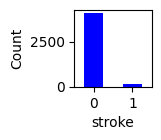

In [24]:
y.value_counts().plot(kind="bar", xlabel="stroke", ylabel="Count", color="blue", rot=0, figsize=(1,1))
y.value_counts().reset_index()

***The number of people have heart stroke is actually negligible as compared to the ones not having it.
The data is higly unbalanced.
So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.***

***We will be using SMOTE technique for this project.***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Balancing Data </span>

In [25]:
from collections import Counter
from imblearn.combine import SMOTETomek 
smk=SMOTETomek(random_state=30)
x_smk, y_smk = smk.fit_resample(x,y)
print("Original Dataset Shape : ",Counter(y))
print("Resample Dataset Shape : ",Counter(y_smk))

Original Dataset Shape :  Counter({0: 4069, 1: 157})
Resample Dataset Shape :  Counter({1: 3738, 0: 3738})


***Now it's quite clear that the data has been completely balanced.***

# <span style="Algerian:cursive;font-size:30px;color:Red;">Model Building</span>

<span style="Algerian:cursive;font-size:25px;color:purple;"> 1. Logistic Regression <span>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score

In [27]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

max_iteration=[]
for i in range(0,1000,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
print("Maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20, ", Accuracy Score :",accuracy)

Random State Number : 1 , Accuracy Score : 0.8279090503789568
Maximum iteration Number : 140 , Accuracy Score : 0.8296923762817655


In [28]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.3,random_state=1)

lr_model = LogisticRegression(max_iter=140)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
df=pd.DataFrame(y_pred_lr,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("lr_Accuracy_score :",accuracy_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('lr_Confusion_matrix : \n',confusion_matrix(y_test,y_pred_lr),"\n\n ***********************************************************")
print('lr_Precision_Score : \n',precision_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('lr_Recall_Score : \n',recall_score(y_test,y_pred_lr))

Table of Predicted and Actual values :
         0
stroke   
1       1
1       1
1       0
1       0
0       0 

 ***********************************************************
lr_Accuracy_score : 0.8296923762817655 

 ***********************************************************
lr_Confusion_matrix : 
 [[885 228]
 [154 976]] 

 ***********************************************************
lr_Precision_Score : 
 0.8106312292358804 

 ***********************************************************
lr_Recall_Score : 
 0.863716814159292


<span style="Algerian:cursive;font-size:25px;color:purple;"> 2. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model_1 = DecisionTreeClassifier(max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(1,15):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=DecisionTreeClassifier(max_depth=k,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+1), ", Accuracy Score :",accuracy)

Random State Number : 17 , Accuracy Score : 0.8341506910387874
Maximum Depth : 6 , Accuracy Score : 0.8341506910387874


In [31]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.3,random_state=17)

dt_model = DecisionTreeClassifier(max_depth=6,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
1       1
1       1
1       1
0       0
0       0 

 ***********************************************************
Accuracy_score : 0.8341506910387874 

 ***********************************************************
Confusion_matrix : 
 [[ 861  262]
 [ 110 1010]] 

 ***********************************************************
Precision_Score : 
 0.7940251572327044 

 ***********************************************************
Recall_Score : 
 0.9017857142857143


In [32]:
from sklearn import tree
from sklearn.tree import plot_tree

b["stroke"].unique()     

array([1, 0], dtype=int64)

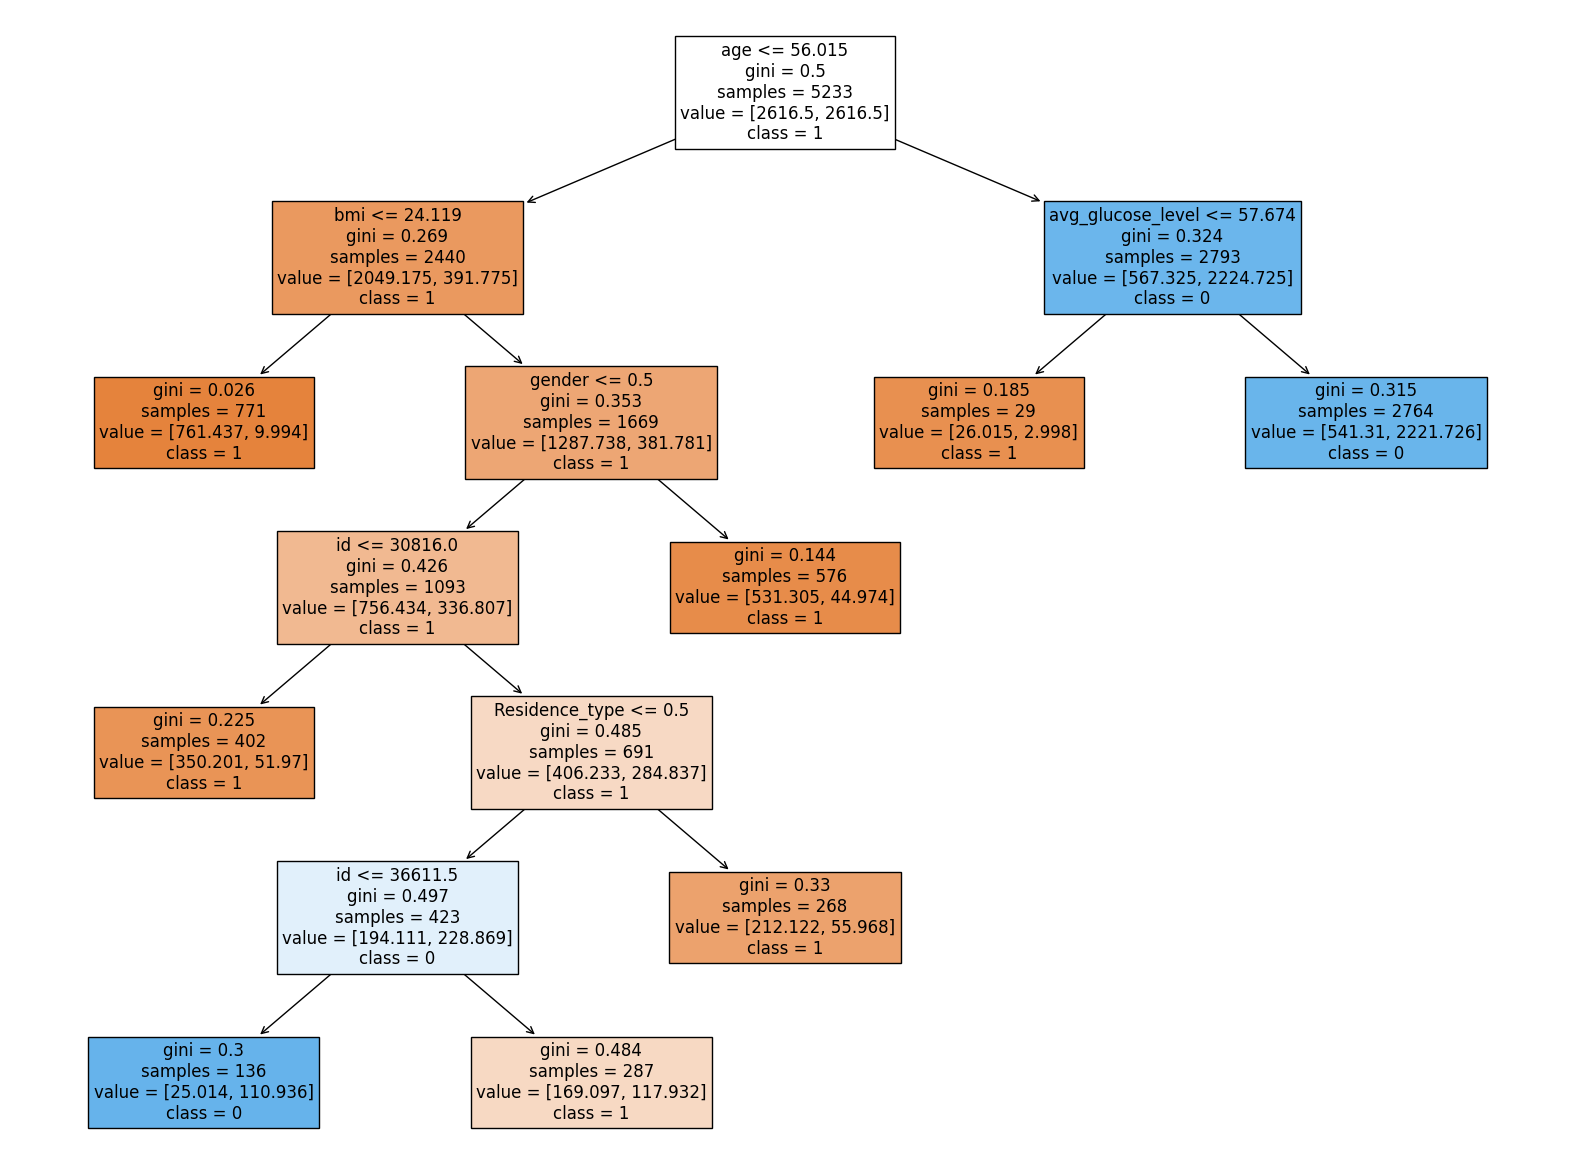

In [33]:
plt.figure(figsize=(20,15))
a=plot_tree(dt_model,fontsize=12,feature_names=x.columns,class_names=["1","0"],filled=True)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:purple;">3. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 11 , Accuracy Score : 0.862238074008025
Maximum Depth : 6 , Accuracy Score : 0.8626839054837272


In [36]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.30,random_state=11)
rf_model = RandomForestClassifier(max_depth=6,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
1       1
1       1
1       1
0       0
1       1 

 ***********************************************************
Accuracy_score : 0.8626839054837272 

 ***********************************************************
Confusion_matrix : 
 [[ 888  217]
 [  91 1047]] 

 ***********************************************************
Precision_Score : 
 0.8283227848101266 

 ***********************************************************
Recall_Score : 
 0.9200351493848857


<span style="Algerian:cursive;font-size:25px;color:purple;"> 4. KNN Algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

Random State Number : 3 , Accuracy Score : 0.7806509139545252
Maximum K_Neighbours : 5 , Accuracy Score : 0.7806509139545252


Text(0.5, 1.0, 'K Neighbours Classifier for different K values')

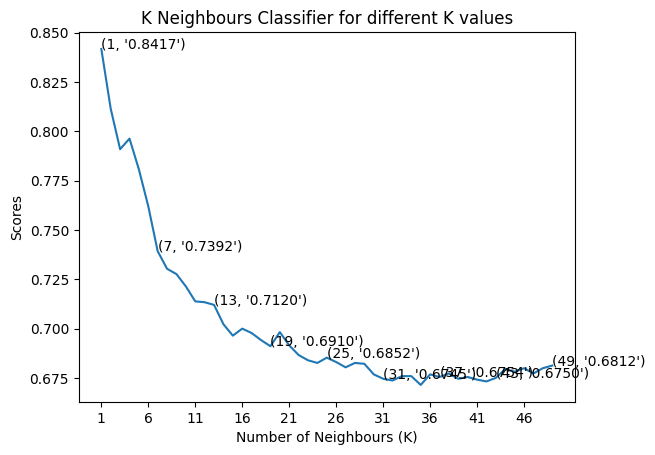

In [38]:
Random_State=[]
for j in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=j)
    knn=KNeighborsClassifier()
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

K_Neighbours=[]
for k in range(5,50,2):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    K_Neighbours.append(accuracy_score(y_test,y_pred))
    accuracy=max(K_Neighbours)
print("Maximum K_Neighbours :",(K_Neighbours.index(max(K_Neighbours))*2+5), ", Accuracy Score :",accuracy)

#Graph Code for KNN
knn_scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    y_prediction=knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test,y_prediction))

plt.plot([k for k in range(1,50)],knn_scores)
for i in range(1,50,6):
    plt.text(i,knn_scores[i-1],(i,'%.4f'%knn_scores[i-1]))
plt.xticks([i for i in range(1,50,5)])
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Scores')
plt.title("K Neighbours Classifier for different K values")

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=3)

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
1       0
0       0
0       0
0       1
1       1 

 ***********************************************************
Accuracy_score : 0.7806509139545252 

 ***********************************************************
Confusion_matrix : 
 [[789 328]
 [164 962]] 

 ***********************************************************
Precision_Score : 
 0.7457364341085271 

 ***********************************************************
Recall_Score : 
 0.8543516873889876


<span style="Algerian:cursive;font-size:25px;color:purple;"> 5. Naive Baye's Algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model=GaussianNB()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 78 , Accuracy Score : 0.8412839946500222


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=78)

nb_model=GaussianNB()
nb_model.fit(x_train , y_train)
y_pred = nb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
0       0
0       0
0       0
1       0
0       0 

 ***********************************************************
Accuracy_score : 0.8412839946500222 

 ***********************************************************
Confusion_matrix : 
 [[ 847  289]
 [  67 1040]] 

 ***********************************************************
Precision_Score : 
 0.782543265613243 

 ***********************************************************
Recall_Score : 
 0.9394760614272809


<span style="Algerian:cursive;font-size:25px;color:purple;"> 6. Support Vector Machine

In [43]:
from sklearn.svm import SVC

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=3)

svm_model=SVC()
svm_model.fit(x_train , y_train)
y_pred = svm_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
1       0
0       0
0       0
0       0
1       1 

 ***********************************************************
Accuracy_score : 0.5229603209986625 

 ***********************************************************
Confusion_matrix : 
 [[879 238]
 [832 294]] 

 ***********************************************************
Precision_Score : 
 0.5526315789473685 

 ***********************************************************
Recall_Score : 
 0.261101243339254


<span style="Algerian:cursive;font-size:25px;color:purple;"> 7. Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=22)

gb_model=GradientBoostingClassifier()
gb_model.fit(x_train , y_train)
y_pred = gb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
0       0
1       1
0       1
1       0
1       1 

 ***********************************************************
Accuracy_score : 0.917967008470798 

 ***********************************************************
Confusion_matrix : 
 [[1015  133]
 [  51 1044]] 

 ***********************************************************
Precision_Score : 
 0.887000849617672 

 ***********************************************************
Recall_Score : 
 0.9534246575342465


# <span style="Algerian:cursive;font-size:25px;color:red;"> Conclusion

In [48]:
data={
    "Algorithms" : ["Logistic Regression", "Decision Tree", "Random Forest Classifier", "KNN Algorithm", "Naive Baye's", "SVM Algorithm", "Gradient Boosting" ],
    "Accuracy" : [  0.8296923762817655 , 0.8341506910387874 , 0.8626839054837272 , 0.7806509139545252 , 0.8412839946500222 , 0.5229603209986625 , 0.917967008470798 ],
    "Precision" : [0.8106312292358804 , 0.7940251572327044 ,  0.8283227848101266 , 0.7457364341085271 , 0.782543265613243 ,  0.5526315789473685 , 0.887000849617672 ],
    "Recall" : [ 0.863716814159292 , 0.9017857142857143 ,  0.9200351493848857 , 0.8543516873889876 , 0.9394760614272809 , 0.261101243339254 , 0.9534246575342465 ]
}

df=pd.DataFrame(data)
df

,Algorithms,Accuracy,Precision,Recall
0,Logistic Regression,0.829692,0.810631,0.863717
1,Decision Tree,0.834151,0.794025,0.901786
2,Random Forest Classifier,0.862684,0.828323,0.920035
3,KNN Algorithm,0.780651,0.745736,0.854352
4,Naive Baye's,0.841284,0.782543,0.939476
5,SVM Algorithm,0.522960,0.552632,0.261101
6,Gradient Boosting,0.917967,0.887001,0.953425


Text(0.5, 1.0, 'Algorithms v/s Scores')

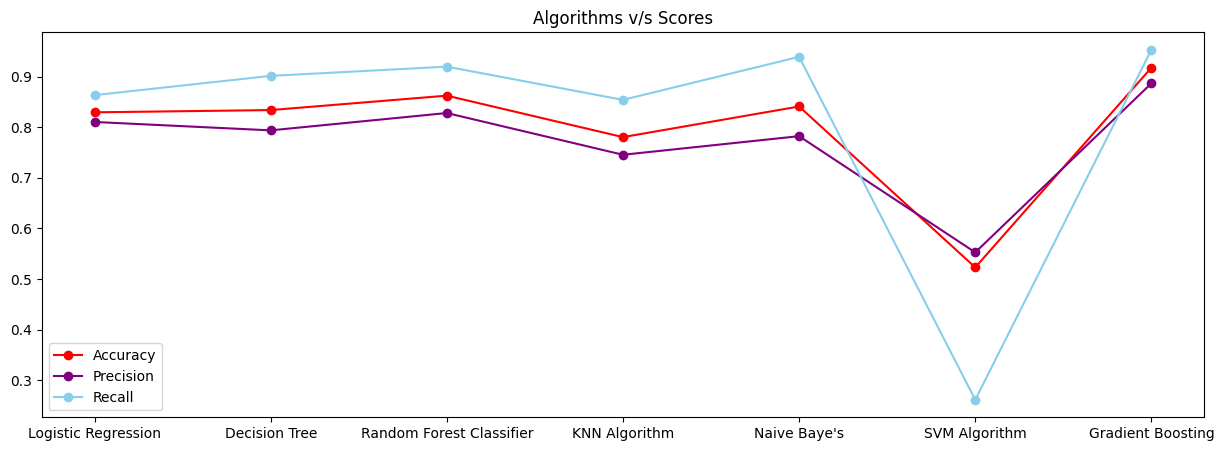

In [49]:
plt.figure(figsize=(15,5))
plt.plot(df["Algorithms"],df["Accuracy"],"red",label="Accuracy",marker="o")
plt.plot(df["Algorithms"],df["Precision"],"purple",label="Precision",marker="o")
plt.plot(df["Algorithms"],df["Recall"],"skyblue",label="Recall",marker="o")
plt.legend()
plt.title("Algorithms v/s Scores")

***So here we observe that gradient boosting gives highest accuracy, precision and recsll as compare to other algorithms so we used gradient boosting algorithm for prediction result.***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Finding Feature Importance Using Gradient Boosting Algorthm

<AxesSubplot: >

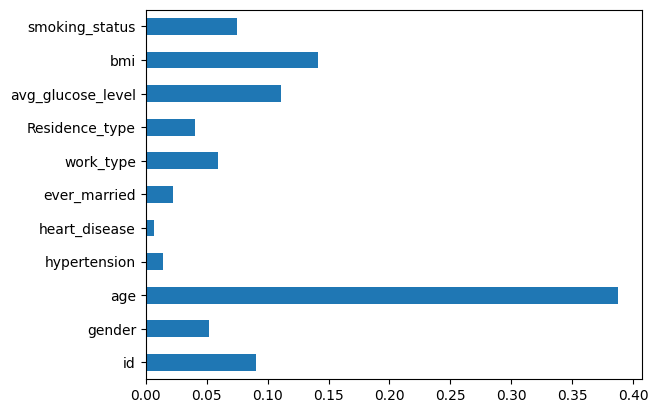

In [62]:
Feature=(pd.Series(rf_model.feature_importances_, index=x.columns))
Feature.plot(kind="barh")

***From above graph we can observe that gender, age, work_type, avg_glucose_level, bmi, smoking_status are important columns.***

***Now using that columns find the accuray using gradient boosting algorithm***

In [63]:
x=b[['gender', 'age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y=b["stroke"]   

In [64]:
#Balancing Data
from collections import Counter
from imblearn.combine import SMOTETomek 
smk=SMOTETomek(random_state=30)
x_smk, y_smk = smk.fit_resample(x,y)
print("Original Dataset Shape : ",Counter(y))
print("Resample Dataset Shape : ",Counter(y_smk))

Original Dataset Shape :  Counter({0: 4069, 1: 157})
Resample Dataset Shape :  Counter({1: 4042, 0: 4042})


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=90)

gb_model=GradientBoostingClassifier()
gb_model.fit(x_train , y_train)
y_pred = gb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
         0
stroke   
0       0
1       1
0       0
1       1
1       1 

 ***********************************************************
Accuracy_score : 0.8887056883759274 

 ***********************************************************
Confusion_matrix : 
 [[1020  191]
 [  79 1136]] 

 ***********************************************************
Precision_Score : 
 0.8560663149962321 

 ***********************************************************
Recall_Score : 
 0.9349794238683128


In [75]:
y_pred = gb_model.predict(x_test)
DF=pd.DataFrame()
DF["Actual_Stroke_Values"]=y_test
DF["Stroke_Predicted_Values"]=y_pred
DF.head()

,Actual_Stroke_Values,Stroke_Predicted_Values
1668,0,0
5116,1,1
3773,0,0
5988,1,1
5763,1,1


# <span style="Algerian:cursive;font-size:35px;color:SkyBlue;">Save The Model

In [76]:
import pickle
filename = "C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Save_Brain_Stroke_Model.sav"
pickle.dump(gb_model,open(filename,"wb"))

# <span style="Algerian:cursive;font-size:35px;color:SkyBlue;">Load the Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
load_model = pickle.load(open("C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Save_Brain_Stroke_Model.sav","rb"))

In [2]:
gender =int(input("\n Enter the Gender [0:Female, 1:Male, 2:Other]: "))
age =float(input("\n Enter the Age : "))
work_type =float(input("\n Enter the Work Type [0:Govt_job, 1:Never_worked, 2:Private, 3:Self-employed, 4:children]: "))
avg_glucose_level =float(input("\n Enter the Average Glucose Level : "))
bmi =float(input("\n Enter the BMI : "))
smoking_status =float(input("\n Enter Smoking Status [0:Unknown, 1:formerly smoked, 2:never smoked, 3:smokes]: "))

m=load_model.predict([[gender, age, work_type, avg_glucose_level, bmi, smoking_status ]])
if(m==0):
    print("\n\n      ✨🎉 ......COGRAGULATIONS......COGRAGULATIONS......COGRAGULATIONS...... 😊  \n\n      You are Safe. You have no Brain Stroke.")
else:
    print("\n\n      😔...............ALERT...............ALERT...............ALERT...............😔  \n      You have a Brain Stroke. Please take care of yourself and take proper treatment.")


 Enter the Gender [0:Female, 1:Male, 2:Other]: 0

 Enter the Age : 63

 Enter the Work Type [0:Govt_job, 1:Never_worked, 2:Private, 3:Self-employed, 4:children]: 2

 Enter the Average Glucose Level : 91

 Enter the BMI : 28

 Enter Smoking Status [0:Unknown, 1:formerly smoked, 2:never smoked, 3:smokes]: 1


      😔...............ALERT...............ALERT...............ALERT...............😔  
      You have a Brain Stroke. Please take care of yourself and take proper treatment.


In [79]:
x_test.head()

,gender,age,work_type,avg_glucose_level,bmi,smoking_status
1668,0,47.000000,0,100.410000,23.800000,2
5116,0,63.434618,2,91.152803,28.451865,1
3773,0,31.000000,0,80.880000,29.300000,1
5988,0,81.662742,2,84.532370,29.567452,1
5763,0,78.129218,2,115.421608,26.712347,1
